In [58]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import scipy.stats as stats
from plotly import graph_objects as go
import datetime
from datetime import datetime
import matplotlib.dates as mdates

In [59]:
import math
from scipy import stats as st
import numpy as np
import math as mth

# Table Of Contents 
1. [Technical description](#15)
2. [Describe the goals of the research](#1)
3. [Explore the data](#2)
    - [Does it need converting types?](#3)
    - [Are there any missing or duplicate values? If so, what's their nature?](#4)

4. [Carry out exploratory data analysis](#5)
    - [Study conversion at different funnel stages](#6)
    - [Is the number of events per user distributed equally in the samples?](#7)
    - [Are there users who enter both samples?](#8)
    - [How is the number of events distributed by days?](#9)
    - [Think of the possible details in the data that you have to take into account before            starting the A/B test?](#10)
5. [Evaluate the A/B test results](#11)
    - [Use the z-criterion to check the statistical difference between the proportions](#13)
    - [What can you tell about the A/B test results?](#12)
    

6. [Describe the conclusions on the EDA stage, as well as on the evaluation of the A/B test results](#14)

<a id="1"></a> 
# Describe the goals of the research

The goal of the research is to check if improved recommendation system helps to increase conversion rates, and if so how high the increase is in each stage of the funnel and how many days it takes to reach it.

<a id="2"></a> 
# Explore the data

<a id="3"></a> 
### Does it need converting types?

In [60]:
calendar  = pd.read_csv("/datasets/ab_project_marketing_events.csv")
display(calendar.head(5))

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [61]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [62]:
calendar['start_dt'] =  calendar['start_dt'].values.astype('datetime64[D]')
calendar['finish_dt'] =  calendar['finish_dt'].values.astype('datetime64[D]')

In [63]:
new_users_events = pd.read_csv("/datasets/final_ab_events_us.csv")
display(new_users_events.head(5))

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [64]:
new_users_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [65]:
new_users_events['event_dt'] =  new_users_events['event_dt'].values.astype('datetime64[ns]')
display(new_users_events.head(5))

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [66]:
new_users_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null datetime64[ns]
event_name    440317 non-null object
details       62740 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [67]:
new_users = pd.read_csv("/datasets/final_ab_new_users_us.csv")
display(new_users.head(5))

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [68]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [69]:
new_users['first_date'] =  new_users['first_date'].values.astype('datetime64[D]')

In [70]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [71]:
test_user = pd.read_csv("/datasets/final_ab_participants_us.csv")
display(test_user.head(5))

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [72]:
test_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


All the dates were in object type, I change it to datatime type.

<a id="4"></a> 
### Are there any missing or duplicate values? If so, what's their nature?

In [73]:
calendar.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [74]:
new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [75]:
test_user.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [76]:
new_users_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [77]:
new_users_events[new_users_events['event_name'] == 'purchase'].isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

There are missing data only in the new_users_events table, "detail" column. The reason is that the column show the total in USD for purchase events. We can see that for every purchace event we have value in column "details", So there aren't really missing values.

In [78]:
calendar.duplicated().sum()

0

In [79]:
new_users.duplicated().sum()

0

In [80]:
new_users_events.duplicated().sum()

0

In [81]:
test_user.duplicated().sum()

0

There arn't duplicates.

<a id="5"></a> 
# Carry out exploratory data analysis

In [82]:
interface_eu_test = test_user[test_user['ab_test']=='interface_eu_test']
recommender_system_test = test_user[test_user['ab_test']=='recommender_system_test']

In [83]:
len(new_users_events)

440317

In [84]:
table_1 = new_users.join(interface_eu_test.set_index('user_id'), on='user_id', how='left')
table_1 = table_1.rename(columns={'group': 'interface_eu_test_group'})
table_1 = table_1.drop('ab_test', axis=1)
display(table_1.head())

,user_id,first_date,region,device,interface_eu_test_group
0,D72A72121175D8BE,2020-12-07,EU,PC,NaN
1,F1C668619DFE6E65,2020-12-07,N.America,Android,NaN
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A
3,50734A22C0C63768,2020-12-07,EU,iPhone,B
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone,NaN


In [85]:
new_users_events_full = new_users_events.join(table_1.set_index('user_id'), on='user_id', how='left')
display(new_users_events_full.head())

,user_id,event_dt,event_name,details,first_date,region,device,interface_eu_test_group
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,B
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN


In [86]:
new_users_events_full = new_users_events_full.join(recommender_system_test.set_index('user_id'), on='user_id', how='left')
new_users_events_full = new_users_events_full.rename(columns={'group': 'recommender_system_test'})
new_users_events_full = new_users_events_full.drop('ab_test', axis=1)
display(new_users_events_full.head())

,user_id,event_dt,event_name,details,first_date,region,device,interface_eu_test_group,recommender_system_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,B,NaN
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN,NaN


In [87]:
new_users_events_full[['interface_eu_test_group', 'recommender_system_test']] = new_users_events_full[['interface_eu_test_group','recommender_system_test']].fillna(value=0)
display(new_users_events_full.head())

,user_id,event_dt,event_name,details,first_date,region,device,interface_eu_test_group,recommender_system_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,0,0
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,0,0
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,0,0
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,B,0
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,0,0


In [88]:
recommender_system_test_events = new_users_events_full[new_users_events_full['recommender_system_test']!= 0]

In [89]:
display(recommender_system_test_events.groupby('recommender_system_test')['user_id'].nunique())

recommender_system_test
A    2747
B     928
Name: user_id, dtype: int64

In [90]:
display(recommender_system_test_events.groupby('region')['user_id'].nunique())

region
APAC           45
CIS            30
EU           3481
N.America     119
Name: user_id, dtype: int64

Seems like the 'recommender_system_test' isn't the right test. we can see that the groups not divided equally, and the region ins't only EU. let's check the second test:

In [91]:
interface_eu_test_events = new_users_events_full[new_users_events_full['interface_eu_test_group']!= 0]

In [92]:
display(interface_eu_test_events.groupby('interface_eu_test_group')['user_id'].nunique())

interface_eu_test_group
A    5467
B    5383
Name: user_id, dtype: int64

In [93]:
display(interface_eu_test_events.groupby('region')['user_id'].nunique())

region
EU    10850
Name: user_id, dtype: int64

In [94]:
display(interface_eu_test_events.groupby('first_date')['user_id'].nunique())

first_date
2020-12-07     957
2020-12-08     551
2020-12-09     401
2020-12-10     483
2020-12-11     413
2020-12-12     723
2020-12-13     753
2020-12-14     994
2020-12-15     552
2020-12-16     383
2020-12-17     557
2020-12-18     595
2020-12-19     595
2020-12-20     759
2020-12-21    1132
2020-12-22     587
2020-12-23     415
Name: user_id, dtype: int64

In [95]:
display(interface_eu_test_events.groupby('event_dt')['user_id'].nunique())

event_dt
2020-12-07 00:02:48    1
2020-12-07 00:03:18    1
2020-12-07 00:03:19    1
2020-12-07 00:03:51    1
2020-12-07 00:03:54    1
                      ..
2020-12-30 09:53:40    1
2020-12-30 12:00:00    1
2020-12-30 12:42:56    1
2020-12-30 12:42:57    1
2020-12-30 18:28:55    1
Name: user_id, Length: 52662, dtype: int64

Seems like the test we need to analyze is "interface_eu_test_group", the division of the groups looks fine, the region is 'EU' only and the events are from 07/12/20-30/12/20. The only mistake I found is that there are new users from 22+23/12/20, but I believe there was a mistake in the description.

In [96]:
interface_eu_test_events = interface_eu_test_events.drop('recommender_system_test', axis=1)
display(interface_eu_test_events.head())

,user_id,event_dt,event_name,details,first_date,region,device,interface_eu_test_group
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,B
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,EU,Android,A
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,EU,Mac,A
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,EU,PC,B
13,0313C457F07C339E,2020-12-07 13:10:48,purchase,9.99,2020-12-07,EU,Mac,A


<a id="6"></a> 
### Study conversion at different funnel stages

In [97]:
users_per_event_name = interface_eu_test_events.groupby(['interface_eu_test_group','event_name'])['user_id'].nunique().reset_index()
users_per_event_name = users_per_event_name.rename(columns={'user_id': 'users_number'})
display(users_per_event_name.head())

,interface_eu_test_group,event_name,users_number
0,A,login,5466
1,A,product_cart,1756
2,A,product_page,3639
3,A,purchase,1931
4,B,login,5383


In [98]:
conversion_A = users_per_event_name[users_per_event_name['interface_eu_test_group']=='A']
conversion_A['proportion of users'] = conversion_A['users_number']/interface_eu_test_events[interface_eu_test_events['interface_eu_test_group']=='A']['user_id'].nunique()
conversion_A = conversion_A.sort_values(by='proportion of users', ascending=False)
conversion_A['proportion of users'] = conversion_A['proportion of users'].round(3)
display(conversion_A.head())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,interface_eu_test_group,event_name,users_number,proportion of users
0,A,login,5466,1.000
2,A,product_page,3639,0.666
3,A,purchase,1931,0.353
1,A,product_cart,1756,0.321


In [99]:
fig = px.bar(conversion_A, x="event_name", y='proportion of users', title='Group A - Conversion', text='proportion of users')
fig.update_layout(barmode='group')
fig.show() 

In [100]:
conversion_B = users_per_event_name[users_per_event_name['interface_eu_test_group']=='B']
conversion_B['proportion of users'] = conversion_B['users_number']/interface_eu_test_events[interface_eu_test_events['interface_eu_test_group']=='B']['user_id'].nunique()
conversion_B = conversion_B.sort_values(by='proportion of users', ascending=False)
conversion_B['proportion of users'] = conversion_B['proportion of users'].round(3)
display(conversion_B.head())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,interface_eu_test_group,event_name,users_number,proportion of users
4,B,login,5383,1.000
6,B,product_page,3527,0.655
5,B,product_cart,1812,0.337
7,B,purchase,1782,0.331


In [101]:
fig = px.bar(conversion_B, x="event_name", y='proportion of users', title='Group B - Conversion', text='proportion of users')
fig.update_layout(barmode='group')
fig.show() 

GROUP A- From 100% users that logged in, 66.6% make it to a product_page, 35.3% make it to the purchase page and 32.1% make it to the product_cart page.
Seems like customers can make a purchase without going first to the product_cart page.
GROUP B- From 100% users that logged in, 65.5% make it to a product_page, 33.7% make it to the product_cart page and 33.1% make it to the purchase page. 

<a id="7"></a> 
### Is the number of events per user distributed equally in the samples?

In [102]:
interface_eu_test_events.head()

,user_id,event_dt,event_name,details,first_date,region,device,interface_eu_test_group
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,B
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,EU,Android,A
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,EU,Mac,A
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,EU,PC,B
13,0313C457F07C339E,2020-12-07 13:10:48,purchase,9.99,2020-12-07,EU,Mac,A


In [103]:
events_per_user = interface_eu_test_events.groupby(['user_id', 'interface_eu_test_group'])['event_dt'].count().reset_index()
events_per_user = events_per_user.rename(columns={'event_dt': 'events_per_user'})
display(events_per_user.head())

,user_id,interface_eu_test_group,events_per_user
0,0002CE61FF2C4011,A,12
1,001064FEAAB631A1,B,6
2,001E72F50D1C48FA,B,6
3,002412F1EB3F6E38,A,8
4,002540BE89C930FB,A,9


GROUP A


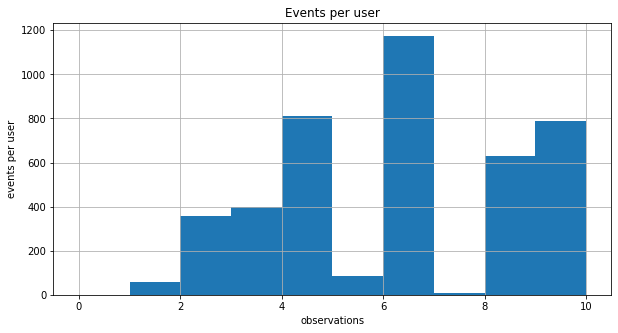

GROUP B


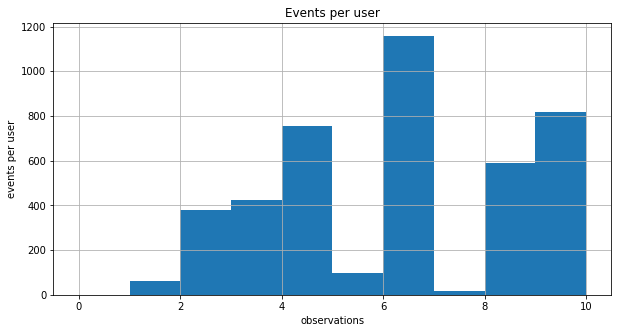

In [104]:
events_per_user[events_per_user['interface_eu_test_group']=='A']['events_per_user'].hist(bins=10, range=(0, 10), figsize=(10,5))
print('GROUP A')
plt.title("Events per user")
plt.xlabel("observations")
plt.ylabel("events per user")
plt.show()

events_per_user[events_per_user['interface_eu_test_group']=='B']['events_per_user'].hist(bins=10, range=(0, 10), figsize=(10,5))
print('GROUP B')
plt.title("Events per user")
plt.xlabel("observations")
plt.ylabel("events per user")
plt.show()

The number of events per user distributed equally in the samples.

<a id="8"></a> 
### Are there users who enter both samples?

In [105]:
groups = interface_eu_test_events.groupby(['user_id'])['interface_eu_test_group'].nunique().reset_index()
display(groups.head(5))

,user_id,interface_eu_test_group
0,0002CE61FF2C4011,1
1,001064FEAAB631A1,1
2,001E72F50D1C48FA,1
3,002412F1EB3F6E38,1
4,002540BE89C930FB,1


In [106]:
groups['interface_eu_test_group'].value_counts()

1    10850
Name: interface_eu_test_group, dtype: int64

There aren't users who enter both samples.

<a id="9"></a> 
### How is the number of events distributed by days?

In [107]:
interface_eu_test_events['event_dt'] =  interface_eu_test_events['event_dt'].values.astype('datetime64[D]')
display(interface_eu_test_events.head())

,user_id,event_dt,event_name,details,first_date,region,device,interface_eu_test_group
3,96F27A054B191457,2020-12-07,purchase,4.99,2020-12-07,EU,iPhone,B
9,A92195E3CFB83DBD,2020-12-07,purchase,4.99,2020-12-07,EU,Android,A
11,354D653172FF2A2D,2020-12-07,purchase,4.99,2020-12-07,EU,Mac,A
12,7FCD34F47C13A9AC,2020-12-07,purchase,9.99,2020-12-07,EU,PC,B
13,0313C457F07C339E,2020-12-07,purchase,9.99,2020-12-07,EU,Mac,A


In [108]:
event_dt = interface_eu_test_events.groupby('event_dt')['event_name'].count()
event_dt.index =event_dt.index.strftime("%Y-%m-%d")
display(event_dt.head())

2020-12-07    2068
2020-12-08    2311
2020-12-09    2333
2020-12-10    2551
2020-12-11    2603
Name: event_name, dtype: int64

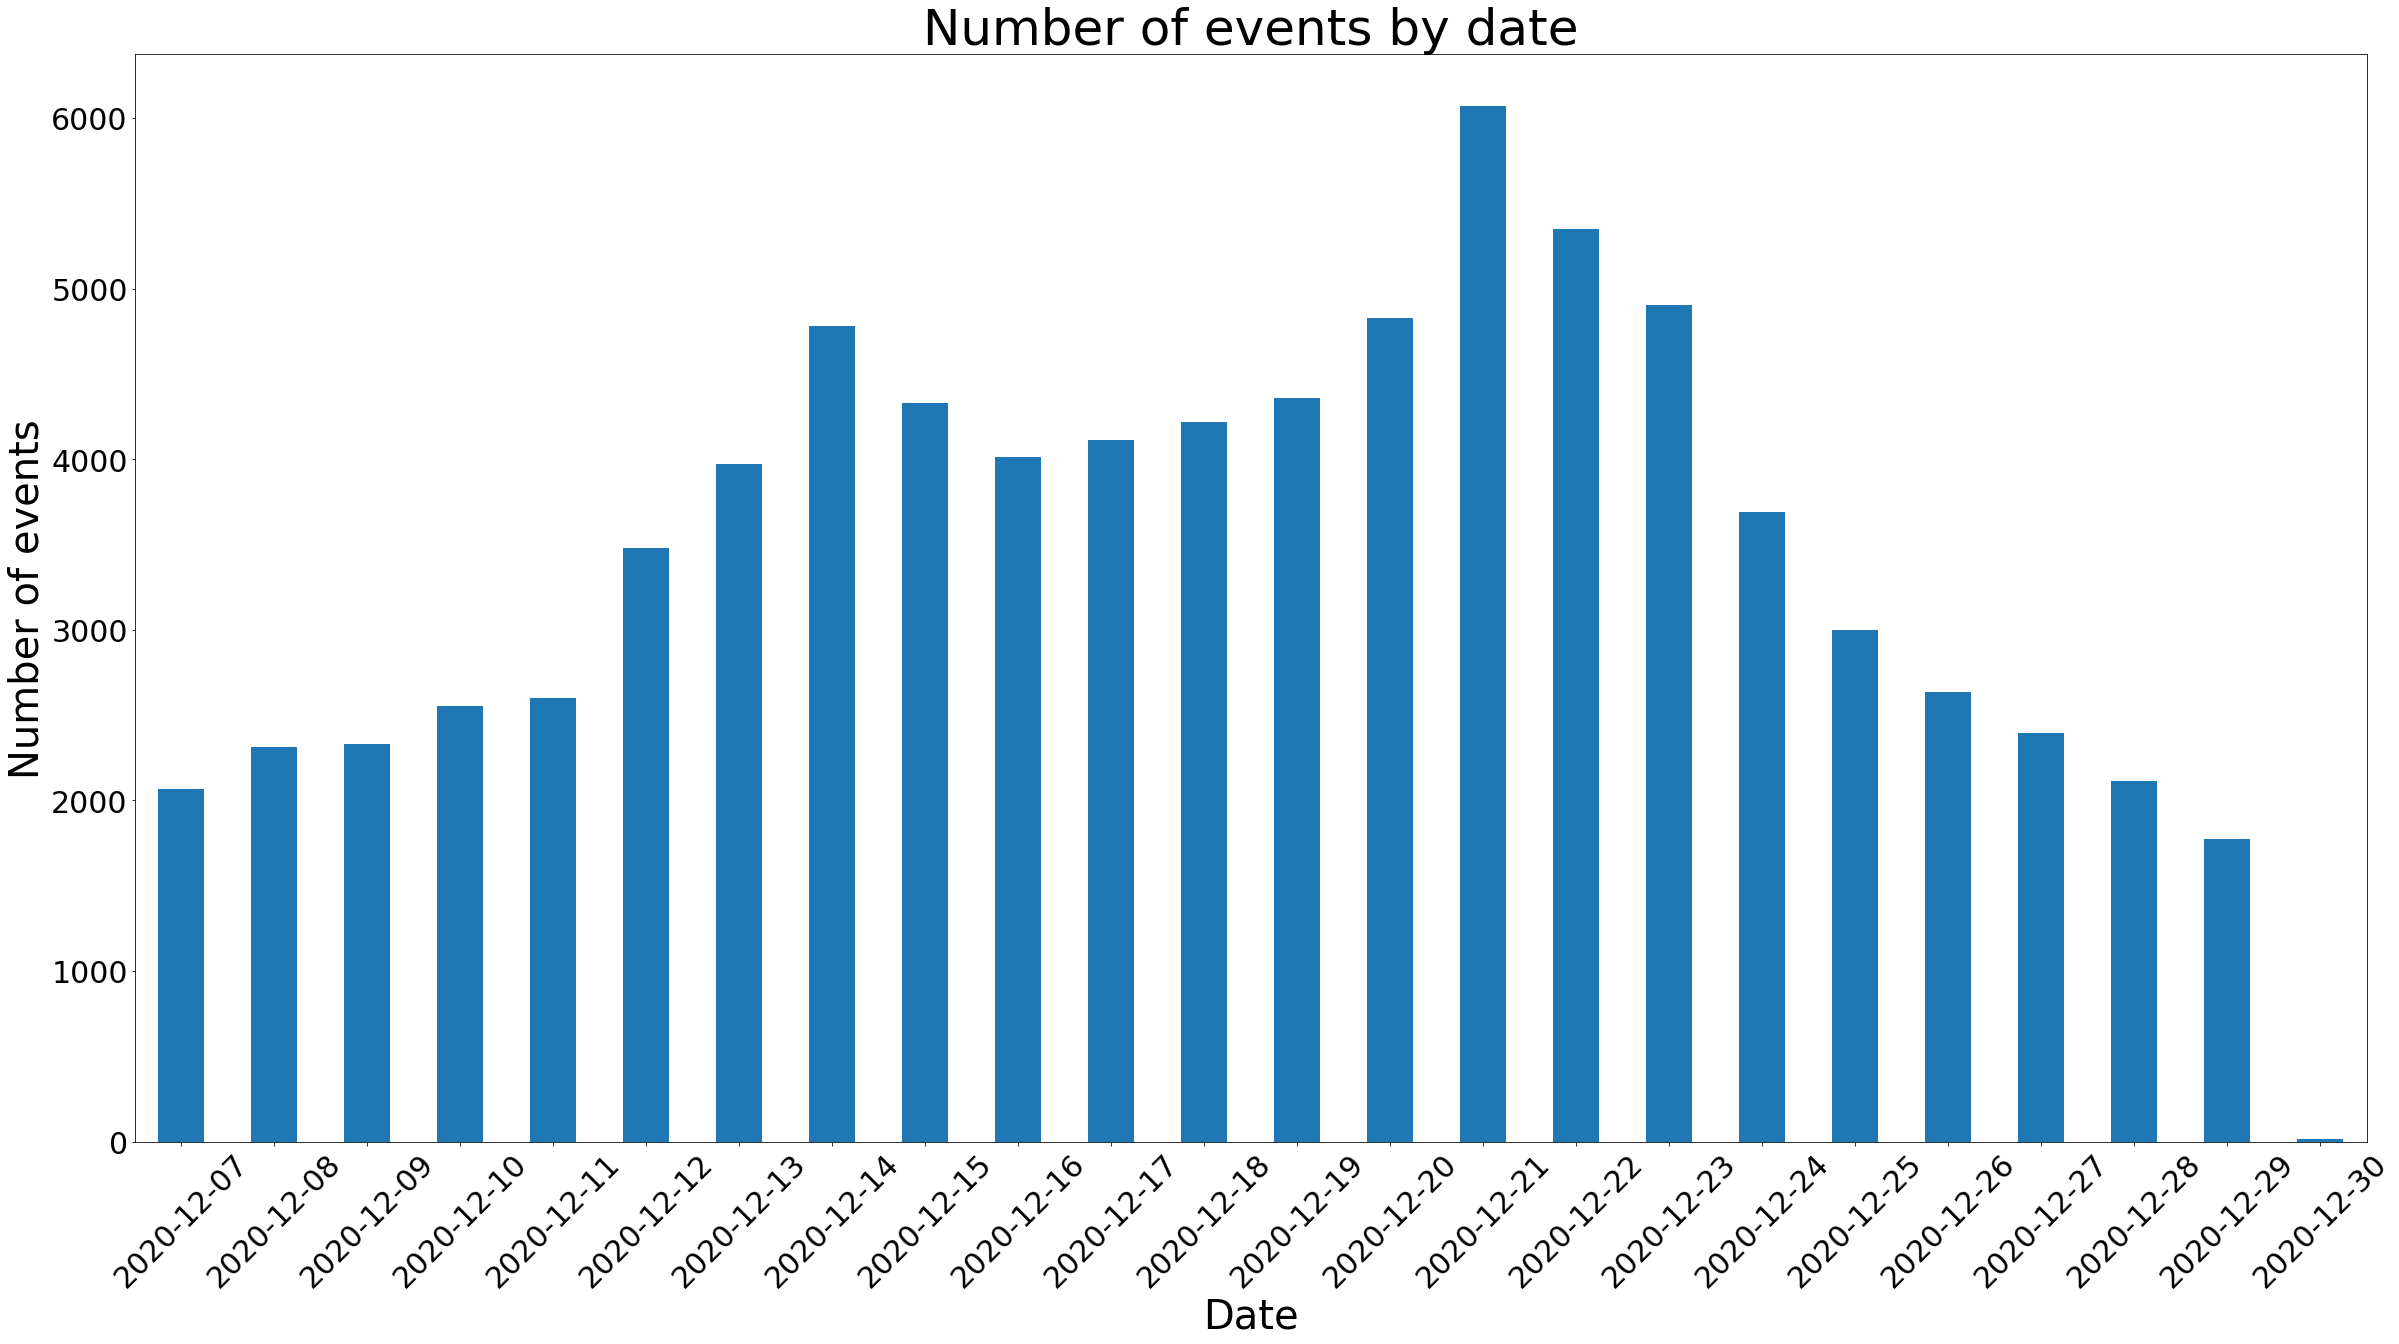

In [109]:
event_dt.plot.bar(x=event_dt, figsize=(40,20))
plt.title("Number of events by date", size = 50)
plt.xlabel('Date', size = 40)
plt.ylabel('Number of events', size = 40)
plt.xticks(rotation=45)
plt.xticks(size = 30)
plt.yticks(size = 30)

plt.show()

In [110]:
calendar.sort_values(by='start_dt', ascending=False).head()

,name,regions,start_dt,finish_dt
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


We can see from the graph that the events per day 

<a id="10"></a> 
### Think of the possible details in the data that you have to take into account before starting the A/B test?

Christmas day was in the 25/12/20, and New Year's Eve was in 31/12/20. I believe this is why we see growth in the number of the events until the 21/12/20, and then  the numbers start to drop. I don't think it was such a brilliant idea to conduct a test in holiday season, I'm not sure how valid the results will be. 

<a id="11"></a> 
# Evaluate the A/B test results

<a id="13"></a> 
### Use the z-criterion to check the statistical difference between the proportions

In [111]:
pivot = interface_eu_test_events.pivot_table(index='event_name', columns='interface_eu_test_group', values='user_id', aggfunc=lambda x: x.nunique()).reset_index()
display(pivot.head())

interface_eu_test_group,event_name,A,B
0,login,5466,5383
1,product_cart,1756,1812
2,product_page,3639,3527
3,purchase,1931,1782


Null hypothesis: the conversion rates for an event is similar for groups A and B. 
Alternative hypothesis: the conversion rates for an  event is different for groups A and B.

In [114]:
def check_hypothesis(group1, group2, event, alpha = 0.05):
    success1 = pivot[pivot.event_name==event][group1].iloc[0]
    success2 = pivot[pivot.event_name==event][group2].iloc[0]
    trials1 = interface_eu_test_events[interface_eu_test_events['interface_eu_test_group'] == group1]['user_id'].nunique()
    trials2 = interface_eu_test_events[interface_eu_test_events['interface_eu_test_group'] == group2]['user_id'].nunique()
    
    p1 = success1/trials1

    p2 = success2/trials2

    p_combined = (success1 + success2) / (trials1 + trials2)

    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = st.norm(0, 1)

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event)
    else:
        print("Failed to reject the null hypothesis for", event)

In [115]:
for event in pivot['event_name'].tolist():
    check_hypothesis('A', 'B', event, alpha = 0.05)
    

p-value:  0.32103485047255065
Failed to reject the null hypothesis for login
p-value:  0.08746918913258162
Failed to reject the null hypothesis for product_cart
p-value:  0.2518419682737163
Failed to reject the null hypothesis for product_page
p-value:  0.014959088807690257
Rejecting the null hypothesis for purchase


In [116]:
conversion_A[conversion_A.event_name=='purchase']['proportion of users'].iloc[0]/conversion_B[conversion_B.event_name=='purchase']['proportion of users'].iloc[0]

1.066465256797583

<a id="12"></a> 
### What can you say about the A/B test results?

We failed to reject the null hypothesis, that the conversion rates for an event is similar for groups A and B, for all events except purchase. The only statistical difference between the proportions we found is in the purchase event, The conversion rate of group A is higher than the conversion rate of group B.

<a id="14"></a> 
# Describe the conclusions on the EDA stage, as well as on the evaluation of the A/B test results

The 'recommender_system_test' wasn't the right test. 
The groups weren't divided equally, and the region wasn't only EU.
The test we analyzed is "interface_eu_test_group", the division of the groups looked fine, the region was 'EU' only and the events were from 07/12/20-30/12/20. The only mistake I found is that there were new users from 22+23/12/20, but I believe there was a mistake in the description.

The test failed to achive its Expected results. Not only there wasn't an increase of 10% in the conversion rates in each stage of the funnel for group B, the conversion rate for group B in the purchase event was actually lower than it was for group A.

Nevertheless it's important to mention that the test was conducted during the holiday season, and the conversion rates didn't stabilized during the test, so I'm not sure how valid the results are.